In [2]:
#import Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#For better chart style
plt.style.use('seaborn-v0_8')

In [3]:
# Parameters - change these to test different stocks
ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2025-01-01"
short_window = 20
long_window = 50

In [4]:
# Download daily stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Show first few rows
data.head()

C:\Users\akach\AppData\Local\Temp\ipykernel_41440\2765654494.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.330658,129.079575,122.443173,128.468202,112117500
2023-01-04,124.602707,126.870724,123.340509,125.125335,89113600
2023-01-05,123.281349,125.993105,123.024970,125.362006,80962700
2023-01-06,127.817352,128.478033,123.153137,124.257564,87754700
2023-01-09,128.340012,131.554685,128.083633,128.655569,70790800


In [5]:
# Calculate short-term and long-term moving averages
data['MA_Short'] = data['Close'].rolling(window=short_window).mean()
data['MA_Long'] = data['Close'].rolling(window=long_window).mean()

In [8]:
# Create Signal column: 1 when MA_Short > MA_Long, else 0
data.loc[data.index[long_window:], 'Signal'] = (
    data['MA_Short'][long_window:] > data['MA_Long'][long_window:]
).astype(int)
# Position column: 1 when buy signal occurs, -1 when sell signal occurs
data['Position'] = data['Signal'].diff()


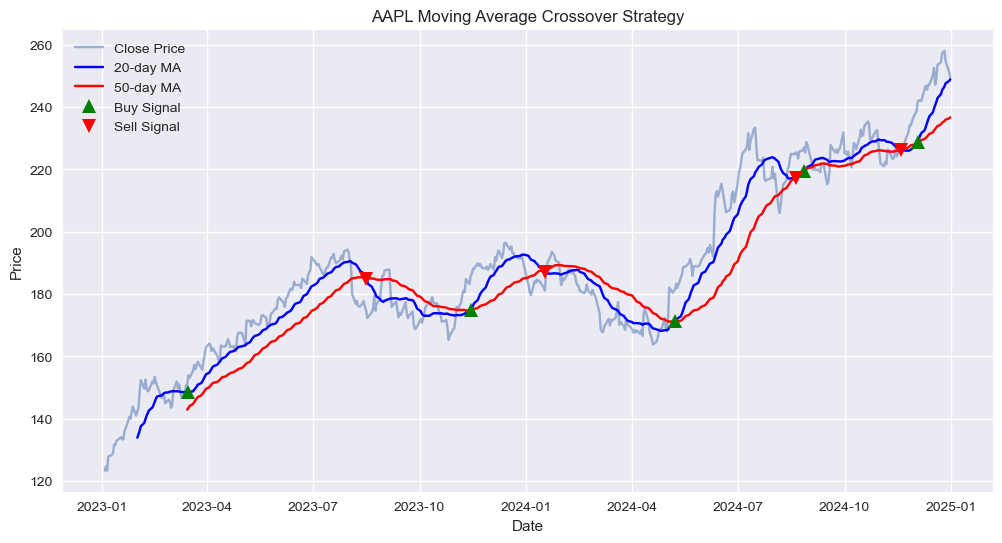

In [9]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['MA_Short'], label=f'{short_window}-day MA', color='blue')
plt.plot(data['MA_Long'], label=f'{long_window}-day MA', color='red')

# Buy signals
plt.plot(data[data['Position'] == 1].index,
         data['MA_Short'][data['Position'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Sell signals
plt.plot(data[data['Position'] == -1].index,
         data['MA_Short'][data['Position'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title(f"{ticker} Moving Average Crossover Strategy")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [10]:
# Results

#The chart above shows:
#- The stock's daily closing price
#- Short-term (20-day) moving average in blue
#- Long-term (50-day) moving average in red
#- **Green arrows** indicate buy signals (short-term MA crossed above long-term MA)
#- **Red arrows** indicate sell signals (short-term MA crossed below long-term MA)

#This strategy is useful for identifying trend changes but does not guarantee profits.
#Always test and backtest before using in real trading.